# Исседование рынка общественного питания в Москве на основе данных Яндекс Карты и Яндекс Бизнес

- Автор: Бахтигареев Руслан
- Дата: 10.05.2025

## 1. Цели и задачи проекта

**Цель:**  провести анализ рынка общественного питания в Москве и написать рекоммендации для выбора места и концепции заведения общепита с помощью датасета составленного на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года

**Задачи:**
1. Загрузить данные  и познакомиться с ними
2. Подготовить данные к исседовательскому анализу, обработать пропуски и дубликаты, привести данные к нужному типу и виду
3. Провести исследовательский анализ: категорий заведений, распределения по районам, сравнить сетевые и несетевые завдеения, количества посадочных мест, найти корреляции, определить топ-15 заведений, среднего чека.
4. Сформулировать итоговый вывод и рекоммендации для заказчика

## 2. Описание данных


#### Описаниие rest_info

- name — название заведения;
- address — адрес заведения;
- district — административный район, в котором находится заведение, например Центральный административный округ;
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- hours — информация о днях и часах работы;
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
- 0 — заведение не является сетевым;
- 1 — заведение является сетевым.
- seats — количество посадочных мест.
#### Описаниие rest_price

- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


## 3. Содержимое проекта


1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы


## 4. Загрузка данных и знакомство с ними


In [6]:
# Для задания по расчету корреляции требуется установить библиотеку
# Устанавливаем библиотеку phik
!pip install phik -U    

In [7]:
# Импортируем библиотеки
# Загружаем библиотеку для работы с табличнми данными
import pandas as pd
# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# Загружаем библиотеку для работы с регулярными выражениями в тексте
import re
# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

In [8]:
# Выгружаем данные в переменные rest_info_df и rest_price_df
rest_info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

- Познакомимся с данными `rest_info_df.csv` и изучим общую информацию о них.

In [10]:
# Выводим первые строки датафрейма на экран
rest_info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [11]:
# Выводим типы данных и пропуски
rest_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


- Познакомимся с данными `rest_price_df.csv` и изучим общую информацию о них.

In [13]:
rest_price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [14]:
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


---

### Промежуточный вывод


Датасет `rest_info_df.csv` содержит 8 столбцов и 8406 строк, в которых представлена информация об заведениях общественно питания.

После первичного анализа данных можно сделать следующие выводы:
- Названия столбцов корректны, имеют стиль snake case.
- Большинство столбцов содержит текст и хранятся в корретном для себя типе данных `object`. 
- Столбец `chain` представлен целыми числами. Содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
- Столбцы rating и seats представлены вещественными числами и хранятся в `float64`. 
- Столбец rating содержит числа до 5.0, размерность можно оптимизировать. 
- Пропуски содержатся только в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.


Датасет `rest_price_df.csv` содержит 4 столбца и 4058 строк, в которых представлена информация о  среднем чеке в заведениях общественного питания

После первичного анализа данных можно сделать следующие выводы:
- Количество строк в первом и втором датасетах не соотвествует, примерно у половины заведений нет информации о среднем чеке.
- Названия столбцов корректны, имеют стиль snake case.
- Столбец `id` имеет тип данных object, что корретно. 
- Столбец `price` содержит текстовые категории оценки цен и имеет тип данных object, что корректно. Содержит пропуски
- Столбец `avg_bill` содержит текстовые данные с диапазоном цен, тип данных object, что корректно. Содержит пропуски
- Столбец `middle_coffee_cup` имеет корретный тип данных `float64` и большое количество пропусков, что можно объяснить тем, что не во всех заведениях подают кофе
- Cтолбец `middle_avg_bill` имеет корретный тип данных float64. Содержит пропуски
- Значения в столбцах соответствуют описанию. 


## 5. Предобработка данных

- Соединим данные в единый датафрейм, изучим корректность типов данных и при необходимости проведём их преобразование.

### Подготовка единого датафрейма

- Объединяем данные двух датасетов в один. Чтобы не потерять данные о половине заведений соединяем  rest_info_df и rest_price_df с  помощью left join

In [20]:
df = rest_info_df.merge(rest_price_df,on = 'id', how = 'left')

In [21]:
#Проверяем
df.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN


In [22]:
#Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


###  Преобразования типов данных

In [24]:
print(f'Количество строк: {len(df)}')

Количество строк: 8406


In [25]:
# Можно понизить разрядность числовых данных 
df_transformed = df.copy()
df_transformed['chain'] = pd.to_numeric(df_transformed['chain'], downcast='integer')
for column in ['middle_avg_bill','middle_coffee_cup','seats','rating']:
    df_transformed[column] = pd.to_numeric(df_transformed[column], downcast='float')

In [26]:
#Проверяем
df_transformed.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float32
chain                   int8
seats                float32
price                 object
avg_bill              object
middle_avg_bill      float32
middle_coffee_cup    float32
dtype: object

###   Проверяем пропуски

In [28]:
# Выводим пропуски в абсолютных и относительных значениях
temp1 = df_transformed.copy()           # Делаем копию текущего датасета
missing = (pd.DataFrame({'Кол-во пропусков': temp1.isnull().sum(), 'Доля пропусков': temp1.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,536,0.063800
rating,0,0.000000
chain,0,0.000000
seats,3611,0.429600
price,5091,0.605600


- Столбец hours содержит 536 пропусков - 6% данных. Количество пропусков достаточно большое, чтобы их удалять. 
- Столбец seats содержит 3611 пропусков - 43% данных, почти половина строк.
- Столбцы price, avg_bill, middle_avg_bill  содержат больше половины пропусков. Как я писал выше, второй датасет с информацией о среднем чеке соответсвует только половине заведений из первого датасета. 
- Столбец middle_coffee_cup 94% пропусков. Часть пропусков может объясняться тем, что не все заведения продают кофе. 

В описании данных говорится, что информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена владельцами бизнеса или найдена в общедоступных источниках. В Яндекс Картах также информация заполняется владельцами или пользователями карт.  В итоге:
- Большая часть пропусков может быть вызвана тем, что владельцы заведения не заводили аккаунт в Яндекс Бизнес и соответсвенно не покупали в нём рекламу, поэтому они не заполняли сведения о своём заведении. Но при этом часть информации могла быть заполнена из общедоступных источников. 
- Некоторые заведения были не очень популярны или не имели своего собственного сайта, откуда можно было бы взять справочную информацию, поэтому данные об этих заведениях содержат пропуски.
- Часть владельцев заведений не пожелала заполнять информацию. Например, количество посадочных мест не заполнялось, чтобы скрыть информацию о заведении для конкурентов.
- Я бы отнес пропуски в столбцах к категории MNAR — неслучайные пропуски, связанные с данными, которых нет в наборе.

###  Проверяем категориальные данные

Далее проверим, встречаются ли в данных значения-индикаторы, которые можно рассматривать как пропуски. Проверяем категориальные данные

In [32]:
for column in ['category', 'district', 'chain']:
    print(f'Уникальные значения в столбце {column}:')
    print(df_transformed[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце chain:
[0 1]



Все значения выглядят корректными. Теперь посмотрим на текстовые данные

In [34]:
for column in ['name', 'address','hours']:
    print(f'Уникальные значения в столбце {column}:')
    print(df_transformed[column].sort_values().unique())
    print()

Уникальные значения в столбце name:
['#КешбэкКафе' '+39 Pizzeria Mozzarella bar' '1 Этаж' ... 'Ясно' 'Яуза'
 'ночной Баку']

Уникальные значения в столбце address:
['Москва, 1-й Автозаводский проезд, 5'
 'Москва, 1-й Балтийский переулок, 3/25'
 'Москва, 1-й Варшавский проезд, 1Ас9' ...
 'Москва, шоссе Энтузиастов, 86А, корп. 3' 'Москва, шоссе Энтузиастов, с2'
 'Москва, № 7']

Уникальные значения в столбце hours:
['Нет информации'
 'вт 08:30–17:00; ср,чт 12:00–20:30; пт 08:30–17:00; сб 09:00–16:30'
 'вт 13:00–21:00; ср 11:00–20:00; чт 13:00–21:00; пт-вс 11:00–20:00' ...
 'чт круглосуточно, перерыв 10:00–20:00; сб круглосуточно'
 'чт-вс 20:00–06:00' nan]



###  Проверяем дубликаты

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [37]:
# Проверяем полные дубликаты в датафрейме df
df_transformed.duplicated().sum()

0

Проверим неявные дубликаты — значения по `id` клиентов должны быть уникальными

In [39]:
# Проверяем неявные дубликаты в датафрейме df
df_transformed.duplicated(subset='id').sum()

0

Дубликаты не обнаружены

Для поиска неявных дубликатов в столбцах `address`, `name` нужно нормализовать данные к нижнему регистру, удалить конечные пробелы  и некоторые другие символы 

In [42]:
# Так выглядят данные в столбцах
# Есть пробелы и заглавные буквы
print(df_transformed['name'])
print(df_transformed['address'])

0                     WoWфли
1             Четыре комнаты
2                      Хазри
3       Dormouse Coffee Shop
4                  Иль Марко
                ...         
8401              Суши Мания
8402               Миславнес
8403                 Самовар
8404            Чайхана Sabr
8405              Kebab Time
Name: name, Length: 8406, dtype: object
0                       Москва, улица Дыбенко, 7/1
1               Москва, улица Дыбенко, 36, корп. 1
2                   Москва, Клязьминская улица, 15
3              Москва, улица Маршала Федоренко, 12
4                  Москва, Правобережная улица, 1Б
                           ...                    
8401                 Москва, Профсоюзная улица, 56
8402    Москва, Пролетарский проспект, 19, корп. 1
8403        Москва, Люблинская улица, 112А, стр. 1
8404        Москва, Люблинская улица, 112А, стр. 1
8405                Москва, Россошанский проезд, 6
Name: address, Length: 8406, dtype: object


In [43]:
#Пишем функцию для нормализации текста в столбцах
def to_snake_case_improved(text):
   
    
    if not isinstance(text, str):
        text = str(text)

    # Шаг 1: Замена CamelCase на snake_case 
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', text)
    s2 = re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)

    # Шаг 2: Замена пробелов и некоторых спец. символов на подчеркивания
    s3 = re.sub(r"[\s\-+!@#$%^&*()=`~?/.,<>;':\"]+", '_', s2)

    # Шаг 3: Удаление повторяющихся подчеркиваний
    s4 = re.sub(r"_+", '_', s3)

    # Шаг 4: Удаление подчеркиваний в начале и конце строки
    s5 = s4.strip('_')

    return s5.lower()

def column_to_snake_case_improved(df, column_name):

    if column_name not in df.columns:
        raise ValueError(f"Столбец '{column_name}' не найден в DataFrame.")

    df_transformed[column_name] =df_transformed[column_name].apply(to_snake_case_improved)
    return df_transformed


In [44]:
# Нормализуем текст в столбце 'name' и проверяем
filtered_df = column_to_snake_case_improved(df_transformed, 'name')
print(filtered_df['name'])

0                    wo_wфли
1             четыре_комнаты
2                      хазри
3       dormouse_coffee_shop
4                  иль_марко
                ...         
8401              суши_мания
8402               миславнес
8403                 самовар
8404            чайхана_sabr
8405              kebab_time
Name: name, Length: 8406, dtype: object


In [45]:
# Нормализуем текст в столбце 'address' и проверяем
filtered_df = column_to_snake_case_improved(df_transformed, 'address')
print(filtered_df['address'])

0                     москва_улица_дыбенко_7_1
1               москва_улица_дыбенко_36_корп_1
2                 москва_клязьминская_улица_15
3            москва_улица_маршала_федоренко_12
4                москва_правобережная_улица_1б
                         ...                  
8401               москва_профсоюзная_улица_56
8402    москва_пролетарский_проспект_19_корп_1
8403        москва_люблинская_улица_112а_стр_1
8404        москва_люблинская_улица_112а_стр_1
8405              москва_россошанский_проезд_6
Name: address, Length: 8406, dtype: object


In [46]:
duplicates = filtered_df.duplicated(subset=['address', 'name'], keep=False)

# Выводим строки, которые являются дубликатами
print(filtered_df[duplicates])



                                    id                       name  category  \
189   072032ce16dc47bfbc63b672c75bd371                       кафе      кафе   
215   897ddbc6746c4388b19dc8a9fcdbb488                       кафе      кафе   
599   be007021c2a44e2f9488f7b3174d1a2b            в_парке_вкуснее      кафе   
600   82ea6220bb4e4ffe83bfdf1dd7b4d556            в_парке_вкуснее   кофейня   
1430  62608690e9cc464fbcd980cfd552e334                  more_poke  ресторан   
1511  a69f018d5c064873a3b491b0121bc1b4                  more_poke  ресторан   
2211  c6ef39ae8a8c483d8f9a6531bc386a2c  раковарня_клешни_и_хвосты  ресторан   
2420  aba1de7ad7d64ac0a3f8684bda29d905  раковарня_клешни_и_хвосты   бар,паб   
3091  3c2a73ea79a04be48858fab3685f2f37            хлеб_да_выпечка  булочная   
3109  d3116844e4e048f99614eb30be3214e0            хлеб_да_выпечка      кафе   

                                                address  \
189                         москва_парк_ангарские_пруды   
215         

In [47]:
# Чтобы узнать количество дубликатов:
print(duplicates.sum())

#Чтобы получить DataFrame только с уникальными строками по этим двум колонкам
df_unique = filtered_df[~filtered_df.duplicated(subset=['address', 'name'], keep='first')]

10


In [48]:
df_unique.shape[0]


8401

Было удалено 5 строк с неявными дубликатами

- Для дальнейшей работы создаем столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [51]:
def is_open_24_7(hours):
    """Определяет, работает ли заведение круглосуточно и ежедневно, исходя из строки расписания."""
    if isinstance(hours, str):  # Проверяем, что hours - строка (не NaN)
        hours = hours.lower()  # Приводим к нижнему регистру для упрощения сравнения
        if 'круглосуточно' in hours or '24/7' in hours:
            if 'ежедневно' in hours or 'каждый день' in hours or 'пн-вс' in hours or 'пн-вск' in hours:
                return True
        else:
            return False
    else: # Обработка NaN и других нестроковых значений
        return False




# Создаем столбец is_24_7
df_unique = df_unique.copy()  
df_unique['is_24_7'] = df_unique['hours'].apply(is_open_24_7)

# Вывод первых нескольких строк DataFrame с новым столбцом
print(df_unique[['address', 'hours', 'is_24_7']].head())

#Проверка результатов: количество True и False
print(df_unique['is_24_7'].value_counts())

                             address  \
0           москва_улица_дыбенко_7_1   
1     москва_улица_дыбенко_36_корп_1   
2       москва_клязьминская_улица_15   
3  москва_улица_маршала_федоренко_12   
4      москва_правобережная_улица_1б   

                                               hours is_24_7  
0                             ежедневно, 10:00–22:00   False  
1                             ежедневно, 10:00–22:00   False  
2  пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...   False  
3                             ежедневно, 09:00–22:00   False  
4                             ежедневно, 10:00–22:00   False  
False    7629
True      730
Name: is_24_7, dtype: int64


In [52]:
# Проверяем
df_unique[df_unique['is_24_7'] == True].head()


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
10,ac32978af97641bfacf996e7f5a50ee5,great_room_bar,"бар,паб",москва_левобережная_улица_12,Северный административный округ,"ежедневно, круглосуточно",4.5,0,102.0,средние,Цена бокала пива:250–350 ₽,NaN,NaN,True
17,b55465d0869648a295ad1d85ed9b5c4f,чайхана_беш_бармак,ресторан,москва_ленинградское_шоссе_71б_стр_2,Северный административный округ,"ежедневно, круглосуточно",4.4,0,96.0,средние,Средний счёт:350–500 ₽,425.0,NaN,True
19,feec6bedccae44cb877d99c13f9aa5d7,пекарня,булочная,москва_ижорский_проезд_5,Северный административный округ,"ежедневно, круглосуточно",4.4,1,NaN,NaN,NaN,NaN,NaN,True
24,0f5d22f5377340d0a81a9328e6ebdcac,drive_café,кафе,москва_улица_дыбенко_9ас1,Северный административный округ,"ежедневно, круглосуточно",4.0,1,NaN,NaN,NaN,NaN,NaN,True
49,a8bbd74669074068ab44bc567022ee27,2_u_ту_ю,пиццерия,москва_ижорская_улица_8а,Северный административный округ,"ежедневно, круглосуточно",2.7,0,NaN,NaN,Средний счёт:900 ₽,900.0,NaN,True


730 заведений общепита работают ежедневно и круглосуточно

In [54]:
# Проверяем кол-во круглосуточных заведений
df_unique['is_24_7'].value_counts()

False    7629
True      730
Name: is_24_7, dtype: int64

In [55]:
#Проверим количество строк после предобработки
print(f'Количество строк: {len(df)}')
print(f'Количество строк после удаления дубликатов: {len(df_unique)}')
deleted_row_count = len(df) - len(df_unique)
share_deleted_row_count = round((deleted_row_count/len(df))*100,2)
print(f'Количество удалённых строк: {deleted_row_count}')
print(f'Доля удалённых строк: {share_deleted_row_count}%')

Количество строк: 8406
Количество строк после удаления дубликатов: 8401
Количество удалённых строк: 5
Доля удалённых строк: 0.06%


---

### Промежуточный вывод



В результате предобработки данных были выполнены следующие действия:

- Понизили разрядность данных в столбцах 'chain','rating'
- Изучены пропуски в данных. Пропуски обнаружились в столбцах 'hours' содержит 536 пропусков - 6% данных и  'seats' содержит 3611 пропусков - 43% данных .
- Столбцы price, avg_bill, middle_avg_bill  содержат больше половины пропусков. Как я писал выше, второй датасет с информацией о среднем чеке соответсвует только половине заведений из первого датасета. 
- Столбец middle_coffee_cup 94% пропусков. Часть пропусков может объясняться тем, что не все заведения продают кофе. 
- Учитывая это количество, пропуски могут отражать особенности заполнения данных владельцами заведений и не являться ошибкой в данных. Поэтому их оставили как есть.
- Данные проверили на явные и неявные дупликаты. Обнаружено 5 строк с неявными дубликатами, они были удалены
- Добавлен стобец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно. Таких 730 заведений

## 6. Исследовательский анализ данных


---

### Изучаем распределение заведений по категориям

Изучим категории заведений представлены в данных. Исследуем количество объектов общественного питания по каждой категории.

In [60]:
# Исседуем распределение заведений по значениям столбца category в абсолютных значениях
print('Распределение заведений по значениям столбца category:')
df_unique['category'].value_counts()

Распределение заведений по значениям столбца category:


кафе               2376
ресторан           2042
кофейня            1412
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [61]:
# и в относительных значениях
df_unique['category'].value_counts(normalize=True)

кафе               0.282823
ресторан           0.243066
кофейня            0.168075
бар,паб            0.090942
пиццерия           0.075348
быстрое питание    0.071777
столовая           0.037496
булочная           0.030473
Name: category, dtype: float64

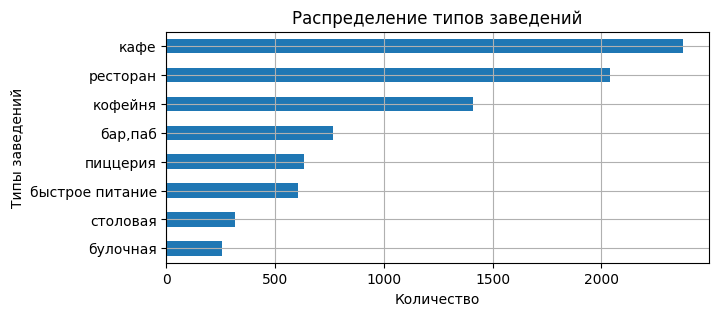

In [62]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим линейчатую диаграмму
df_unique['category'].value_counts().sort_values().plot(
               kind='barh', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение типов заведений'
)

# Настраиваем оформление графика
plt.xlabel('Количество')
plt.ylabel('Типы заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

- Самые популярыне виды заведений, это кафе 28%, ресторан 24% и кофейня 16%. Далее по популярности идут бар,паб, пиццерия, кофейня. Самые редкие типы заведений - булочная и столовая.            


---

### Изучаем распределение заведений по административным округам

Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы.

In [65]:
# Исседуем распределение заведений по значениям столбца district в абсолютных значениях
print('Распределение заведений по административным округам:')
df_unique['district'].value_counts()

Распределение заведений по административным округам:


Центральный административный округ         2242
Северный административный округ             897
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [66]:
# и в относительных значениях
df_unique['district'].value_counts(normalize=True)

Центральный административный округ         0.266873
Северный административный округ            0.106773
Южный административный округ               0.106178
Северо-Восточный административный округ    0.105940
Западный административный округ            0.101178
Восточный административный округ           0.094989
Юго-Восточный административный округ       0.084990
Юго-Западный административный округ        0.084395
Северо-Западный административный округ     0.048685
Name: district, dtype: float64

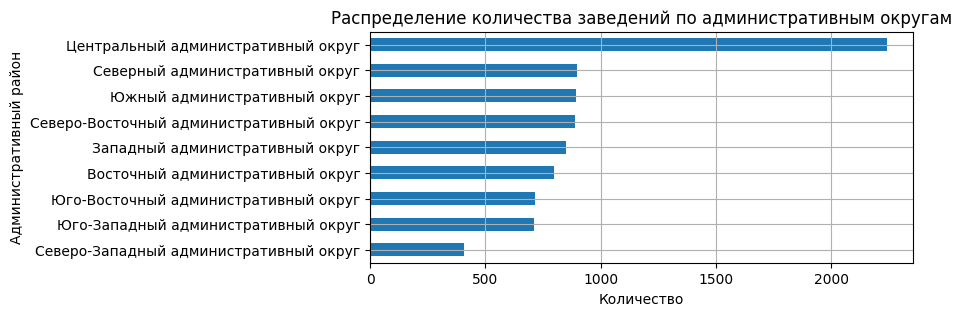

In [67]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим линейчатую диаграмму
df_unique['district'].value_counts().sort_values().plot(
               kind='barh', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений по административным округам'
)

# Настраиваем оформление графика
plt.xlabel('Количество')
plt.ylabel('Административный район')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

- В большинстве округов находится от 700 до 900 заведений. Больше всего заведений, более 2.2 тысяч, в Центральном административном округе. Меньше всего в Северо-Западном административном округе, менее 500.

In [69]:
subset_df = df_unique.loc[df_unique['district'] == 'Центральный административный округ']
cao = subset_df['category'].value_counts()
print('Распределение заведений по категориям в ЦАО:')
print(cao)

Распределение заведений по категориям в ЦАО:
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: category, dtype: int64


In [70]:
percent_cao = subset_df['category'].value_counts(normalize=True)
print(percent_cao)

ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: category, dtype: float64


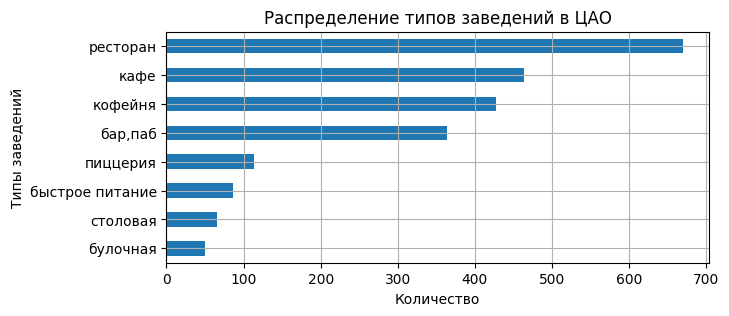

In [71]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))


# Строим линейчатую диаграмму с помощью pandas через plot(kind='barh')
cao.sort_values().plot(
               kind='barh', # Тип графика - линейчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение типов заведений в ЦАО'
)

# Настраиваем оформление графика
plt.xlabel('Количество')
plt.ylabel('Типы заведений')

# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

- В отличие от общего распределения в ЦАО на первом месте находятся рестораны 30% , а не кафе 21%. Также сравнительно больше баров и пабов 16%.

---

### Изучаем распределение сетевых и несетевых заведений

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. 

In [74]:
df_unique['chain'].value_counts()

0    5199
1    3202
Name: chain, dtype: int64

In [75]:
df_unique['chain'].value_counts(normalize=True)

0    0.618855
1    0.381145
Name: chain, dtype: float64

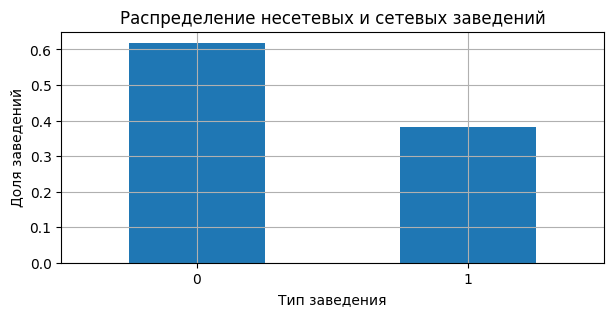

In [76]:

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
df_unique['chain'].value_counts(normalize=True).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение несетевых и сетевых заведений'
)

# Настраиваем оформление графика
plt.xlabel('Тип заведения')
plt.ylabel('Доля заведений')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Больше 60 % заведений не являются сетевыми. 

In [78]:
# Группируем данные и считаем долю сетевых и несетевых заведений
chain_groups = df_unique.groupby('category')['chain'].value_counts().unstack(fill_value=0)
chain_groups

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1597,779
кофейня,693,719
пиццерия,303,330
ресторан,1313,729
столовая,227,88


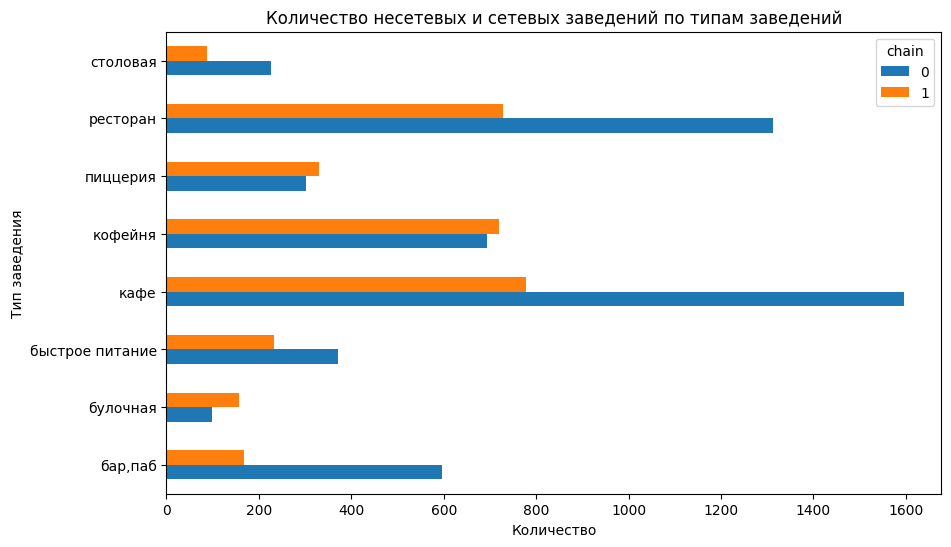

In [79]:
# Делаем визуализацию df_grouped с помощью метода plot(kind='bar'....)
chain_groups.plot(kind='barh',
                title='Количество несетевых и сетевых заведений по типам заведений',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Количество')
plt.ylabel('Тип заведения')
# Отображаем график
plt.show()

In [80]:
# Группируем по category и chain, считаем количество
category_chain_grouped = df_unique.groupby(['category', 'chain']).size().unstack(fill_value=0)

#  Рассчитываем долю сетевых заведений в каждой категории
category_chain_grouped['Доля сетевых'] = category_chain_grouped[1] / (category_chain_grouped[0] + category_chain_grouped[1])
category_chain_grouped['Доля сетевых'].sort_values(ascending=False)

category
булочная           0.613281
пиццерия           0.521327
кофейня            0.509207
быстрое питание    0.384743
ресторан           0.357003
кафе               0.327862
столовая           0.279365
бар,паб            0.219895
Name: Доля сетевых, dtype: float64

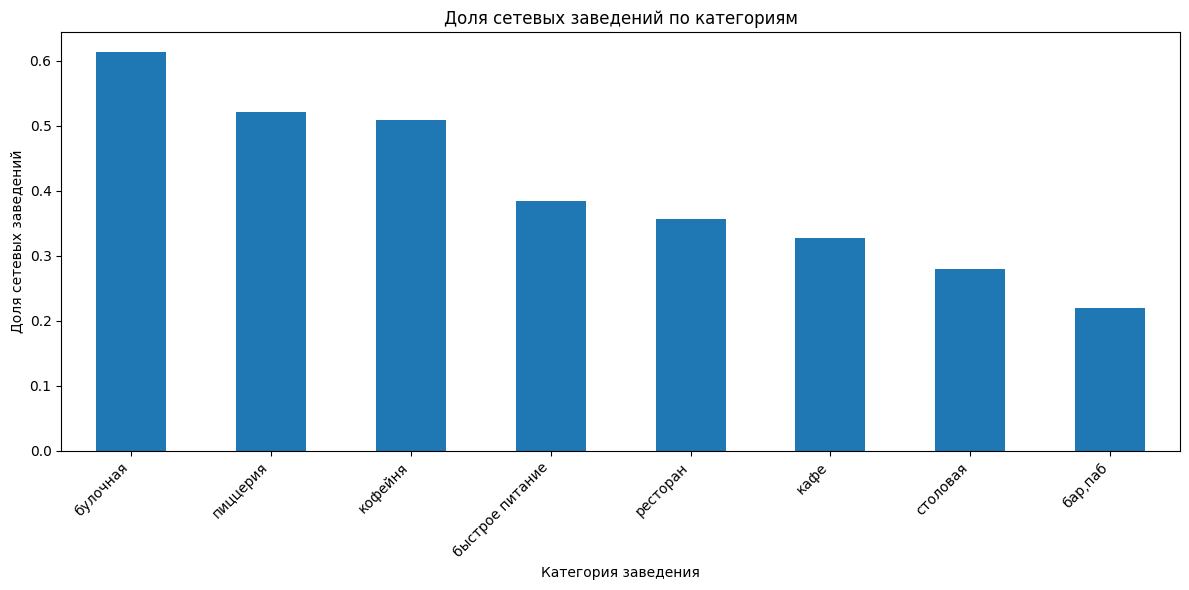

In [81]:
#  Строим график
category_chain_grouped['Доля сетевых'].sort_values(ascending=False).plot(kind='bar',
                                                            figsize=(12, 6),
                                                            title='Доля сетевых заведений по категориям')
plt.xlabel('Категория заведения')
plt.ylabel('Доля сетевых заведений')
plt.xticks(rotation=45, ha='right')  # Поворачиваем метки по оси X для читаемости
plt.tight_layout() #  Предотвращает обрезание меток по краям графика
plt.show()

- Количество сетевых заведений превышает количество несетевых  в следующих типах заведений: булочная 61%, пиццерия 52% и кофейня 51% . В остальных типах заведений   несетевых  больше. Меньше всего сетевы заведений среди баров и пабов 22%. 

---

### Изучаем количество посадочных мест в заведениях

Исследуем количество посадочных мест в заведениях. Исследуем данные на предмет аномальных значений или выбросов.


In [84]:
# Изучаем статистические показатели столбца seats
print('Статистические показатели столбца seats:')
df_unique['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361435
std       122.841133
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Минимальное значение 0 и максимальное 1288 являются выбросами. Среднее значение существенно выше, чем медиана, что может говорить о наличии выбросов с высоким значением. Стандартное отклонение говорит о большом разбросе данных. 

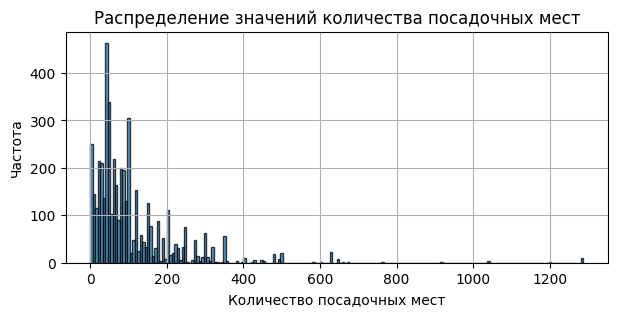

In [86]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_unique['seats'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=200, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

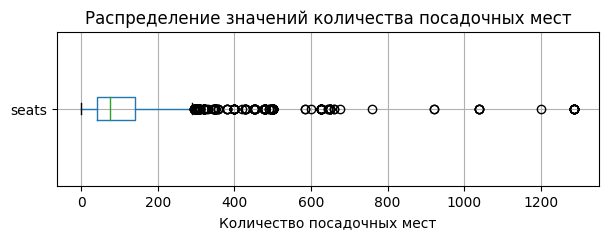

In [87]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце score
df_unique.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений количества посадочных мест')
plt.xlabel('Количество посадочных мест')

# Выводим график
plt.show()

- Правоассиметричное распределение с "длинным" хвостом высоких значений
- Посадочные места со значением 0  относятся к выбросам. Эта категория выбросов может объясняться тем, что некоторые заведения не имеют посадочных мест, например точка с шаурмой. Или 0 это значение - индикатор, которое говорит о пропусках.
- Также есть аномально высокие значения. Например, согласно Яндекс Нейро самый большой ресторан Москвы «Галерея художника» имеет 4 зала общей вместимостью 100 - 150 человек и банкетный зал в 500 человек. Большое количество посадочных мест, может быть в банкетных залах, фуд-кортах и заведениях питания при спортивно-концертных комплексах. 

In [89]:
#Посмотрим подробнее на заведения с высокими значениями
print(df_unique[df_unique['seats'] > 500].head())

                                    id             name  category  \
1326  83575e8d81064584ab791877c9d5389c              нам   бар,паб   
1351  9d703f8cdfb7487abbad137d19083ad0    максима_пицца  пиццерия   
1355  e925b8a0c4c54f24b5fa008f28ff0482       страдивари  ресторан   
1367  0884fb8437f848f98677d3d4b92ae23d         академия  пиццерия   
1380  b8e5cece843a4a52851b12ac8e90bdef  север_метрополь   кофейня   

                                      address  \
1326   москва_ленинградский_проспект_69_стр_1   
1351  москва_ленинградский_проспект_78_корп_1   
1355  москва_ленинградский_проспект_77_корп_1   
1367  москва_ленинградский_проспект_72_корп_1   
1380  москва_ленинградский_проспект_75_корп_1   

                             district                                 hours  \
1326  Северный административный округ                ежедневно, 11:00–21:00   
1351  Северный административный округ  пн-пт 09:00–00:00; сб,вс 10:00–00:00   
1355  Северный административный округ                

In [90]:
sub_set2 = df_unique[df_unique['seats'] > 500]
seats_counts2 = sub_set2.groupby('seats').size()
print(seats_counts2)

seats
585.0      2
600.0      1
625.0     23
644.0      2
650.0      6
660.0      2
675.0      1
760.0      1
920.0      2
1040.0     4
1200.0     1
1288.0    11
dtype: int64


В заведениях с кол-вом мест более 500 есть два значения с наибольшим количеством заведений 625 и 1288. Это могут быть ошибки. Следует отфильтровать данные.  

In [92]:
#Теперь посмотрим на аномально низкие значения
sub_set3 = df_unique[df_unique['seats'] < 5]
seats_counts3 = sub_set3.groupby('seats').size()
print(seats_counts3)

seats
0.0    136
1.0      4
2.0     15
3.0     13
4.0     25
dtype: int64


Большая часть аномально низких значений, 136 заведений имеют 0 кол-во посадочных мест. 

In [94]:
#Посмотрим подробнее на заведения с нулевыми значениями
df_unique[df_unique['seats'] == 0].head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
84,3793bd736bbb4dd08f734d53bfa57b24,meat_doner_kebab,булочная,москва_улица_лескова_22,Северо-Восточный административный округ,"ежедневно, круглосуточно",4.5,0,0.0,NaN,Средний счёт:300 ₽,300.0,NaN,True
177,3fb68f4204274347b94b5cb397fedce7,арамье,булочная,москва_улица_800_летия_москвы_22_корп_2,Северный административный округ,"ежедневно, 09:00–21:00",4.0,1,0.0,NaN,NaN,NaN,NaN,False
196,bfd0d5a3a91f43e9a43f4a5fe96144f1,донер_шашлык,ресторан,москва_улица_лескова_22,Северо-Восточный административный округ,"ежедневно, круглосуточно",4.5,0,0.0,NaN,NaN,NaN,NaN,True
203,78f050b65d4146ef932b734db72e1e86,тандыр_№_1,кафе,москва_улица_лескова_22г,Северо-Восточный административный округ,"ежедневно, круглосуточно",4.0,1,0.0,NaN,NaN,NaN,NaN,True
211,4636272b73bd40c59c156725492f2c05,неаполитан_пицца,кафе,москва_улица_пришвина_23,Северо-Восточный административный округ,"ежедневно, 12:00–23:00",4.3,0,0.0,NaN,NaN,NaN,NaN,False


Действительно, среди них много заведений, которые продают шаурму. Нулевое количество посадочных мест для таких заведений не является ошибкой

Учитывая вышеописанное, лучше использовать медиану, а не среднее арифметическое, чтобы избежать искажений. 

In [97]:
# Группируем данные и считаем медианное значение seats
median_seats = df_unique.groupby('category')['seats'].median().sort_values()
median_seats

category
булочная           50.0
пиццерия           55.0
кафе               60.0
быстрое питание    65.0
столовая           75.5
кофейня            80.0
бар,паб            82.0
ресторан           86.0
Name: seats, dtype: float32

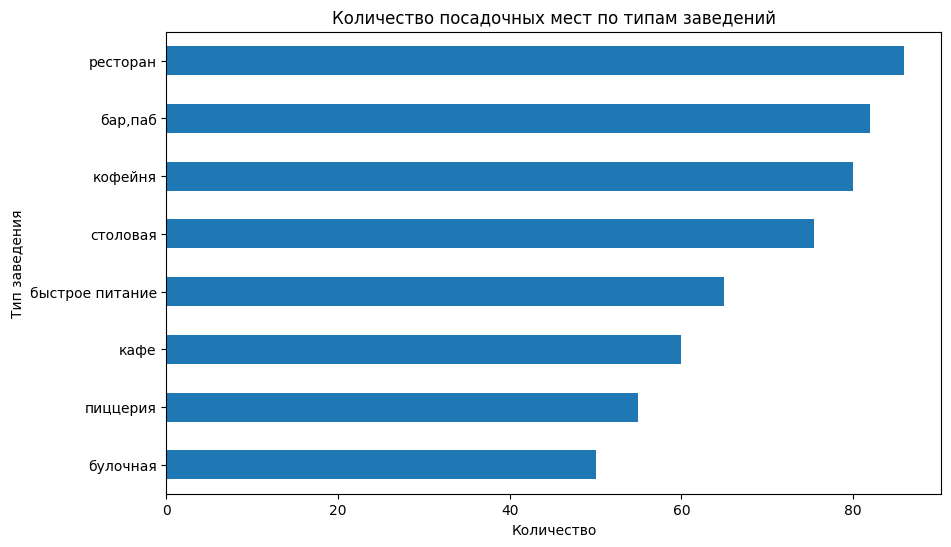

In [98]:

# Делаем визуализацию df_grouped с помощью метода plot(kind='bar'....)
median_seats.plot(kind='barh',
                title='Количество посадочных мест по типам заведений',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Количество')
plt.ylabel('Тип заведения')
# Отображаем график
plt.show()

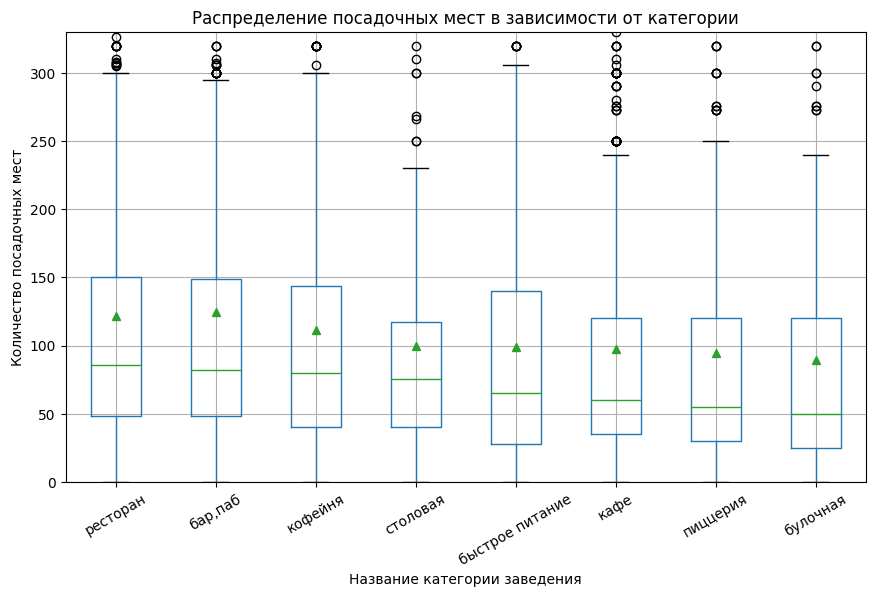

In [99]:
tmp = df_unique.copy()  # Создаем копию датасета, что бы не работать с исходным

# Вычисление медианы для каждой категории
medians = tmp.groupby('category')['seats'].median().sort_values(ascending=False)

# Сортировка по медиане
sorted_categories = medians.index
tmp['category'] = pd.Categorical(tmp['category'], categories=sorted_categories, ordered=True)

tmp.boxplot(column='seats', 
             by='category', 
             grid=True,       # Выводим сетку на диаграмму
             showmeans=True,  # Зеленый треугольники показывают среднее значение  
             figsize=(10, 6))

# Добавление заголовка и меток осей
plt.title('Распределение посадочных мест в зависимости от категории')
plt.xlabel('Название категории заведения')
plt.ylabel('Количество посадочных мест')

plt.xticks(rotation = 30)  #  Поворачиваем метки на оси Х, что бы они не сливались 
plt.ylim(0,330)            # Ограничиваем вывод для того, чтобы боксплоты были крупными, 
                           # если убрать, то будут видны все выбросы
plt.suptitle('')           # Удаление метки "seats" с оси X
plt.show()                 # Отображение диаграммы

- Больше всего посадочных мест(медиана) в ресторане (86), баре, пабе (82) и кофейне(80), а меньше всего в булочной(50). 
Половина всех заведений попадает в диапазаон от 40 до 140 посадочных мест. 

---

### Изучаем рейтинг заведений

In [102]:

rating = df_unique.groupby('category')['rating'].describe()
rating = rating.sort_values(by='mean')
print(rating)

                  count      mean       std  min  25%  50%  75%  max
category                                                            
быстрое питание   603.0  4.050249  0.560949  1.1  3.9  4.2  4.3  5.0
кафе             2376.0  4.124284  0.566001  1.0  4.0  4.2  4.4  5.0
столовая          315.0  4.211429  0.454205  1.0  4.1  4.3  4.4  5.0
булочная          256.0  4.268360  0.386303  1.3  4.2  4.3  4.4  5.0
кофейня          1412.0  4.278753  0.368250  1.4  4.1  4.3  4.4  5.0
ресторан         2042.0  4.290401  0.413143  1.0  4.2  4.3  4.5  5.0
пиццерия          633.0  4.301264  0.336162  1.0  4.2  4.3  4.4  5.0
бар,паб           764.0  4.387697  0.380392  1.1  4.3  4.4  4.6  5.0


Значения рейтинга имеют распределение близкое к нормальному. 

In [104]:
# Группируем данные и считаем среднее значение rating
mean_rating = df_unique.groupby('category')['rating'].mean()
print(mean_rating)

category
бар,паб            4.387696
булочная           4.268359
быстрое питание    4.050249
кафе               4.124285
кофейня            4.278754
пиццерия           4.301264
ресторан           4.290401
столовая           4.211429
Name: rating, dtype: float32


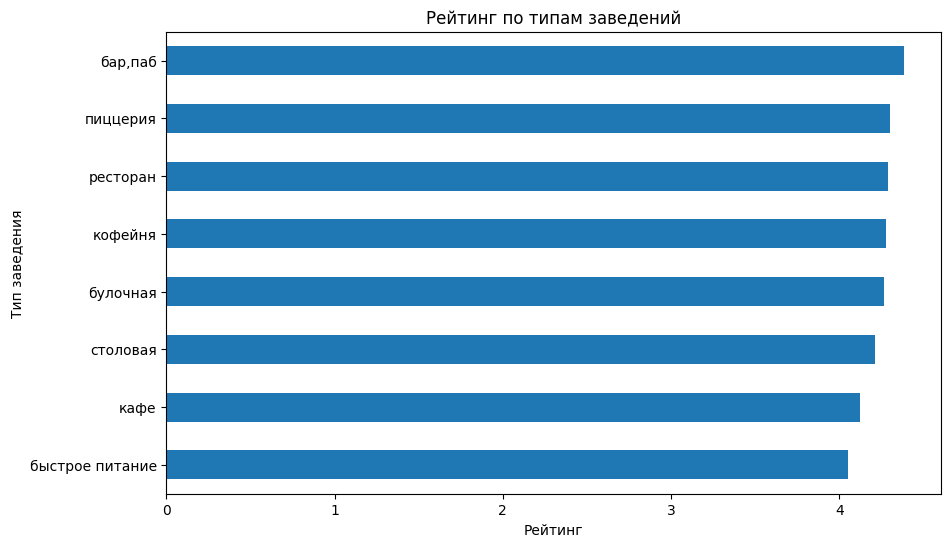

In [105]:
# Делаем визуализацию df_grouped с помощью метода plot(kind='bar'....)
mean_rating = mean_rating.sort_values()
mean_rating.plot(kind='barh',
                title='Рейтинг по типам заведений',
                rot=0,
                figsize=(10, 6))
plt.xlabel('Рейтинг')
plt.ylabel('Тип заведения')

# Отображаем график
plt.show()

- Средний рейтинг всех типов заведений чуть выше 4. Отличия разных типов заведений небольшие. При этом рейтинг заведений быстрого питания 4.05 является самым низким, а баров,пабов 4.39 самым высоким. 

- Самое большое стандартное отклонение рейтинга у заведений быстрого питания и кафе, а самый низкий у пиццерии. Владельцам фастфуда и кафе нужно внимательнее относиться к рейтингам, а пиццерии и бары, пабы менее требовательны к вниманию владельцев к вопросу 

---

### Изучим корреляцию рейтинга заведений с другими категориями

In [109]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = df_unique[['category', 'district', 'chain', 'seats', 'price',
                         'is_24_7','rating']].phik_matrix()

# Выводим результат
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.262056
category,0.199065
district,0.189582
is_24_7,0.161814
chain,0.118926
seats,0.000000


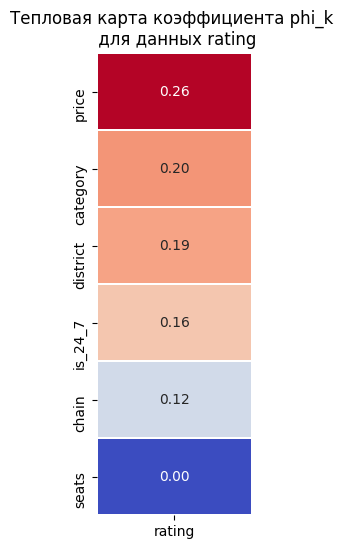

In [110]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака churn с другими признаками клиента
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, # Отображаем численные значения в ячейках карты
            fmt='.2f', # Форматируем значения корреляции: два знака после точки
            cmap='coolwarm', # Устанавливаем цветовую гамму от красного (макс. значение) к синему
            linewidths=0.5, # Форматируем линию между ячейками карты
            cbar=False # Отключаем цветовую шкалу
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')


# Выводим график
plt.show()

Наибольшая корреляция рейтинга наблюдается с ценой (0.26). 

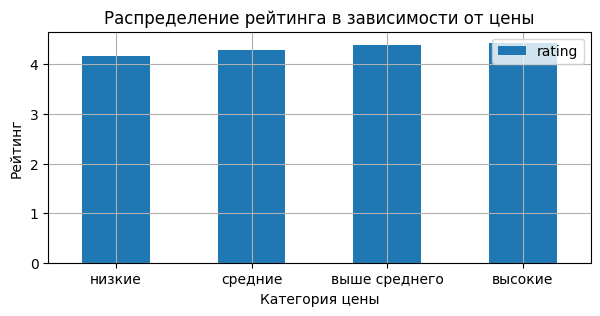

In [112]:
# Построим график столбчатой диаграммы
rating_and_price_correlation = df_unique.groupby('price')['rating'].mean()
rating_and_price_correlation  = rating_and_price_correlation.sort_values()
rating_and_price_correlation.plot(kind='bar',
               title=f'Распределение рейтинга в зависимости от цены',
               legend=True,
               ylabel='Рейтинг',
               xlabel='Категория цены',
               rot=0,
               figsize=(7, 3))
plt.grid()

# Выводим график
plt.show()

In [113]:
print(rating_and_price_correlation)

price
низкие           4.173077
средние          4.297874
выше среднего    4.386348
высокие          4.436611
Name: rating, dtype: float32


- Видно, что есть слабая  зависимости между категорией цены и рейтингом. Чем выше категория цены, тем выше рейтинг

---

### Изучаем топ-15 популярных сетей

Сгруппируем данные по названиям заведений и найдём топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. 

In [116]:
#Выбирем только сетевые заведения
chain_catering = df_unique[df_unique['chain'] == 1]
# Создаем сводную таблицу
pivot_table = pd.pivot_table(
    chain_catering,
    values=['id', 'rating'],  # Какие значения агрегируем
    index=['name', 'category'],  # По каким индексам
    aggfunc={'id': 'count', 'rating': 'mean'}  # Какие функции агрегации применяем
)
pivot_table = pivot_table.rename(columns={
        'id': 'количество_заведений',
        'rating': 'средний_рейтинг'})
# Сортируем и берем топ-15 (как описано выше)
pivot_table = pivot_table.sort_values(by='количество_заведений', ascending=False)
top_15 = pivot_table.head(15)
top_15

,,количество_заведений,средний_рейтинг
name,category,,
шоколадница,кофейня,119,4.178151
домино_с_пицца,пиццерия,76,4.169737
додо_пицца,пиццерия,74,4.286487
яндекс_лавка,ресторан,72,3.855556
one_price_coffee,кофейня,71,4.064789
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114285
кофепорт,кофейня,42,4.147619
кулинарная_лавка_братьев_караваевых,кафе,39,4.394872


- По типам заведений больше всего сетей кофеен 6 и кафе 3. Сетей ресторанов 3 и две пиццерии. Булочная всего одна - Буханка. 

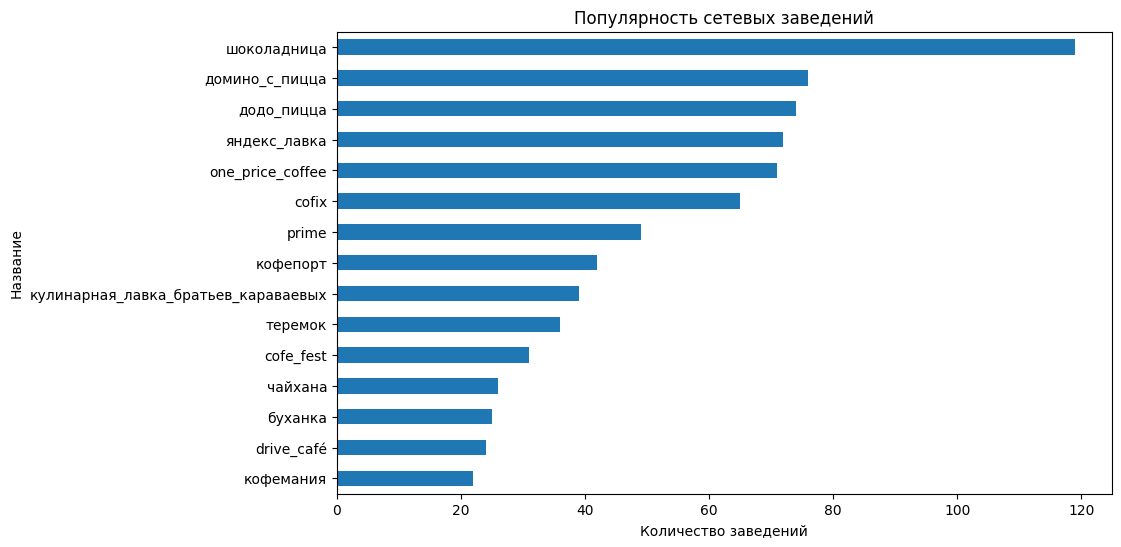

In [118]:
# Сбрасываем индексы для обращения к столбцу name
top_15 = top_15.reset_index()
# Делаем визуализацию 
top_15.plot(kind='barh', 
            x='name', 
            y='количество_заведений',
            title='Популярность сетевых заведений',
            legend=False,
            rot=0,
            figsize=(10, 6))
plt.xlabel('Количество заведений')
plt.ylabel('Название')
plt.gca().invert_yaxis() 
# Отображаем график
plt.show()

- Самое большое кол-во заведений с большим отрывом у сети Шоколадница, 120. Далее идут Доминос Пицца и Додо Пицца с 76 и 74 заведениями соответственно. 

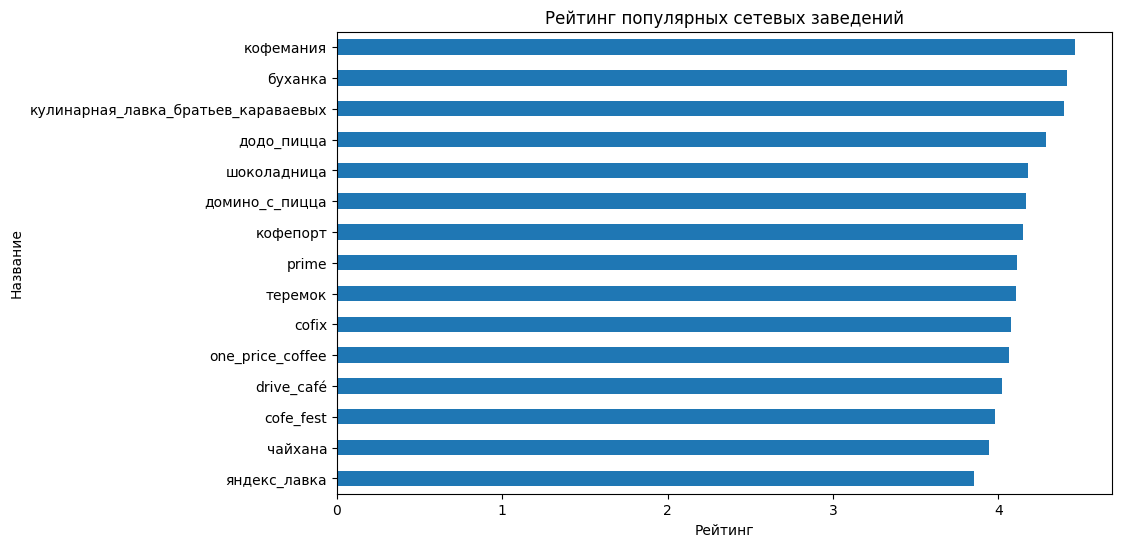

In [120]:

# Делаем визуализацию 
top_15.sort_values(by='средний_рейтинг', ascending=False).plot(kind='barh',
            x='name',
            y='средний_рейтинг',
            title='Рейтинг популярных сетевых заведений',
            legend=False,
            rot=0,
            figsize=(10, 6))
plt.xlabel('Рейтинг')
plt.ylabel('Название')
plt.gca().invert_yaxis() 
# Отображаем график
plt.show()

- Самый высокий рейтинг у сетей Кофемания 4.46, Буханка 4.42 и Кулинарная лавка братьев Караваевых 4.39. 


---

### Изучим вариацию среднего чека в округах

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


- Сначала посмотрим на вариацию среднего чека в целом

In [124]:
print('Статистические показатели столбца middle_avg_bill:')
df_unique['middle_avg_bill'].describe()

Статистические показатели столбца middle_avg_bill:


count     3149.000000
mean       958.053650
std       1009.732849
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

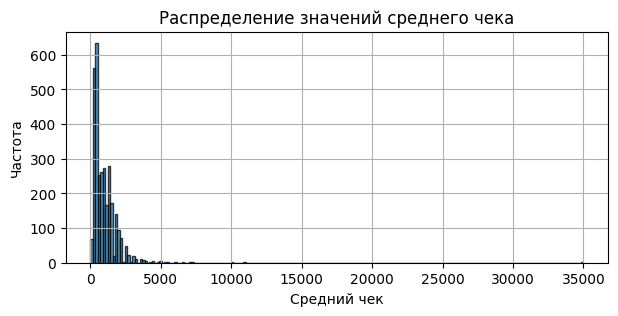

In [125]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df_unique['middle_avg_bill'].plot(
                kind='hist', # Тип графика - гистограмма
                bins=200, # Устанавливаем количество корзин - всего 200
                alpha=0.75,
                edgecolor='black',
                rot=0, # Градус вращения подписи по оси Х
)

# Настраиваем оформление графика
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

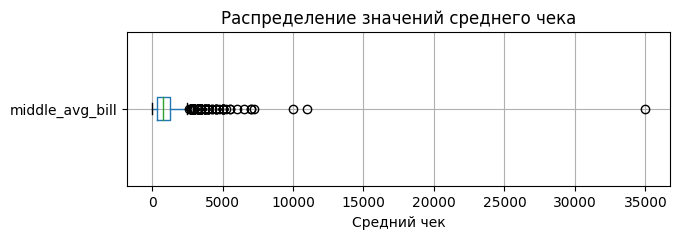

In [126]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 2))

# Строим диаграмму размаха значений в столбце middle_avg_bill
df_unique.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')

# Выводим график
plt.show()

- Правоассиметричное распределение с "длинным" хвостом высоких значений
- Максимальное значение в 35000 может относится к естественным выбросам
- Минимальное знаечние в 0 скорее является ошибкой или индикатором Null
- Много выбросов между 2.500 и 7000, но эти данные не являются ошибкой, поскольку в Москве много дорогих ресторанов
- Среднее значение 958, стандартное отклонение 1010 является высоким
- Лучшее понимание даёт медиана 750

- Посмотрим на вариацию среднего чека по районам

In [129]:
# Создаем сводную таблицу
pivot_table_district_middle_avg_bill = pd.pivot_table(
    df_unique,
    values=['middle_avg_bill'],  # Какие значения агрегируем
    index=['district'],  # По каким индексам
    aggfunc={'middle_avg_bill': ['median', 'mean']}  # Какие функции агрегации применяем
)

# Сортируем 
pivot_table_district_middle_avg_bill = pivot_table_district_middle_avg_bill.sort_values(by=('middle_avg_bill', 'mean'), ascending=False)
# Убираем уровень 'middle_avg_bill'
pivot_table_district_middle_avg_bill.columns = pivot_table_district_middle_avg_bill.columns.droplevel()
pivot_table_district_middle_avg_bill

,mean,median
district,,
Центральный административный округ,1191.057495,1000.0
Западный административный округ,1053.225464,1000.0
Северный административный округ,927.959656,650.0
Южный административный округ,834.398071,500.0
Северо-Западный административный округ,822.222900,700.0
Восточный административный округ,820.626953,575.0
Юго-Западный административный округ,792.561707,600.0
Северо-Восточный административный округ,716.611267,500.0
Юго-Восточный административный округ,654.097961,450.0


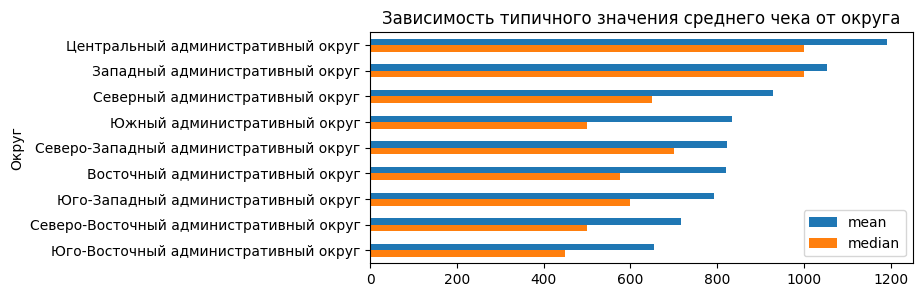

In [130]:

pivot_table_district_middle_avg_bill.plot(kind='barh',
               title='Зависимость типичного значения среднего чека от округа',
               ylabel='Значение чека',  
               xlabel='Округ', 
               rot=0,
               figsize=(7, 3)
               )                         
plt.gca().invert_yaxis() 

# Create a dictionary to map old labels to new, more readable labels


plt.legend(title='')
# Выводим график
plt.show()

- Самый высокий средний чек в ЦАО  и ЗАО, медиана составляет 1000 р., причем среднее арифметическое в ЦАО больше, 1200 против 1050, что скорее всего связано с большой долей очень дорогих заведений.
- На третьем месте находится СЗАО, 700 р. медиана.
- Самый низкий средний чек ЮВАО, медиана 450 р., среднее арифметическое 650 р.   В остальных АО медиана колеблется от 500 до 700 р. 

---


---

### Промежуточный вывод



- Самые популярные виды заведений кафе 28%, ресторан 24% и кофейня 16%
- В большинстве округов находится от 700 до 900 заведений. Больше всего заведений, более 2.2 тысяч, в Центральном административном округе. Меньше всего в Северо-Западном административном округе, менее 500.
- В отличие от общего распределения в ЦАО на первом месте находятся рестораны 30% , а не кафе 21%. Также сравнительно больше баров и пабов 16%.
- Больше 60% заведений не являются сетевыми. Количество сетевых заведений превышает количество несетевых в следующих типах заведений: булочная 61%, пиццерия 52% и кофейня 51%. Меньше всего сетевых заведений среди баров и пабов 22%. 
- Наиболее типичное значение кол-ва посадочных мест  в  ресторане (86), баре, пабе (82) и кофейне(80) посадочных мест, а меньше всего в булочной(50). Половина всех заведений попадает в диапазон от 40 до 140 посадочных мест.
- Встречаются аномалии в кол-ве посадочных мест. Значения 0 можно объяснить тем, что часть заведений не имеет посадочных мест, например точки продажи шаурмы. Большое количество посадочных мест, может быть в банкетных залах, фуд-кортах и заведениях питания при спортивно-концертных комплексах.
- Средний рейтинг всех типов заведений чуть выше 4. Отличия разных типов заведений небольшие. При этом рейтинг заведений быстрого питания 4.05 является самым низким, а баров, пабов 4.39 самым высоким.
- Существует слабая  корреляция между категорией цены и рейтингом.  Чем выше категория цены, тем выше рейтинг
- Топ - 15 сетей. Самое большое кол-во заведений с большим отрывом у сети Шоколадница, 120. Далее идут Доминос Пицца и Додо Пицца с 76 и 74 заведениями соответственно. По типам заведений больше всего сетей кофеен 6 и кафе 3. Сетей ресторанов 3 и две пиццерии. Булочная всего одна - Буханка.
- Самый высокий рейтинг из топ-15 у сетей Кофемания 4.46, Буханка 4.42 и Кулинарная лавка братьев Караваевых 4.39. 
- Самый высокий средний чек в ЦАО  и ЗАО, медиана составляет 1000 р., причем среднее арифметическое в ЦАО больше, 1200 против 1050, что скорее всего связано с большой долей очень дорогих заведений. На третьем месте находится СЗАО, 700 р. медиана.  Самый низкий средний чек ЮВАО, медиана 450 р., среднее арифметическое 650 р.   В остальных АО медиана колеблется от 500 до 700 р. 

## 7. Итоговый вывод и рекомендации  

#### Общий обзор проделанной работы
1. Загрузили данные и познакомились с ними. 
- Названия столбцов корректны, значения соответствуют описанным данным
- Размерность столбцов 'chain','rating' можно оптимизировать
- В датафрейме  rest_info пропуски содержатся в столбцах 'hours' и 'seats' 
- В датафрейме rest_price в 2 раза меньше строк, соответственно более половины ресторанов не имеют информацию о среднем чеке

2. Подготовили единый датафрейм. Проверили ошибки в данных, провели предобработку
- Соединили rest_info_df и rest_price_df с  помощью left join, чтобы  не потерять данные о половине заведений
- Понизили разрядность данных в столбцах 'chain','rating
- Изучены пропуски в данных. Пропуски обнаружились в столбцах 'hours' содержит 536 пропусков - 6% данных и 'seats' содержит 3611 пропусков - 43% данных. Столбцы price, avg_bill, middle_avg_bill содержат больше половины пропусков. Столбец middle_coffee_cup 94% пропусков.
- Учитывая это количество, пропуски могут отражать особенности заполнения данных владельцами заведений и не являться ошибкой в данных. Большая часть пропусков может быть вызвана тем, что владельцы заведения не заводили аккаунт в Яндекс Бизнес и соответственно не покупали в нём рекламу, поэтому они не заполняли сведения о своём заведении. Я бы отнес пропуски к категории MNAR — неслучайные пропуски, связанные с данными, которых нет в наборе.
- Данные проверили на явные и неявные дубликаты. Обнаружено 5 строк с неявными дубликатами, они были удалены
- Добавлен столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно. Таких 730 заведений
3. Провели исследовательский анализ заведений общественного питания:
- категорий, типов заведений
- распределение заведений по административным округам
- сетевых и несетевых
- количество посадочных мест
- корреляцию между рейтингом и другими показателями
- топ-15 популярных сетей
- средний чек в зависимости от района



#### Ответы на исследовательские вопросы, или главные выводы

- Самые популярные виды заведений кафе 28%, ресторан 24% и кофейня 16%
- В большинстве округов находится от 700 до 900 заведений. Больше всего заведений, более 2.2 тысяч, в Центральном административном округе. Меньше всего в Северо-Западном административном округе, менее 500.
- В отличие от общего распределения в ЦАО на первом месте находятся рестораны 30% , а не кафе 21%. Также сравнительно больше баров и пабов 16%.
- Больше 60% заведений не являются сетевыми. Количество сетевых заведений превышает количество несетевых в следующих типах заведений: булочная 61%, пиццерия 52% и кофейня 51%. Меньше всего сетевых заведений среди баров и пабов 22%. 
- Наиболее типичное значение кол-ва посадочных мест  в  ресторане (86), баре, пабе (82) и кофейне(80) посадочных мест, а меньше всего в булочной(50). Половина всех заведений попадает в диапазон от 40 до 140 посадочных мест.
- Встречаются аномалии в кол-ве посадочных мест. Значения 0 можно объяснить тем, что часть заведений не имеет посадочных мест, например точки продажи шаурмы. Большое количество посадочных мест, может быть в банкетных залах, фуд-кортах и заведениях питания при спортивно-концертных комплексах.
- Средний рейтинг всех типов заведений чуть выше 4. Отличия разных типов заведений небольшие. При этом рейтинг заведений быстрого питания 4.05 является самым низким, а баров, пабов 4.39 самым высоким.
- Существует слабая  корреляция между категорией цены и рейтингом.  Чем выше категория цены, тем выше рейтинг
- Топ - 15 сетей. Самое большое кол-во заведений с большим отрывом у сети Шоколадница, 120. Далее идут Доминос Пицца и Додо Пицца с 76 и 74 заведениями соответственно. По типам заведений больше всего сетей кофеен 6 и кафе 3. Сетей ресторанов 3 и две пиццерии. Булочная всего одна - Буханка.
- Самый высокий рейтинг из топ-15 у сетей Кофемания 4.46, Буханка 4.42 и Кулинарная лавка братьев Караваевых 4.39. 
- Самый высокий средний чек в ЦАО  и ЗАО, медиана составляет 1000 р., причем среднее арифметическое в ЦАО больше, 1200 против 1050, что скорее всего связано с большой долей очень дорогих заведений. На третьем месте находится СЗАО, 700 р. медиана.  Самый низкий средний чек ЮВАО, медиана 450 р., среднее арифметическое 650 р.   В остальных АО медиана колеблется от 500 до 700 р. 

#### Рекомендации для открытия заведений общепита на основе анализа данных.
- При выборе типа заведения следует ориентироваться на самые популярные категории: кафе, ресторан, кофейня. Примером альтернативной стратегии является, когда ставка делается на непопулярную категорию, например, булочные Буханка, сеть которая захватила сегмент булочных в спальных районах Москвы.
- Если планируется открыть сеть заведений, то лучше всего подходит булочная, пиццерия и кофейня. Меньше всего подходит бар, паб.   
- В ЦАО самая высокая конкуренция, поэтому следует открывать заведения в других районах. Стоит попробовать начать с Северо-Западного округа, где наиболее низкая конкуренция и самая высокая величина среднего чека  после ЦАО и ЗАО.  С другой стороны, низкое количество заведений в этом районе может свидетельствовать о низком платёжеспособном спросе жителей района или  о том, что большинство жителей предпочитают ходить заведения в центре и новые заведения не будут пользоваться спросом. 
- Если открывать ресторан, бар-паб, кофейню, столовую, то следует ориентироваться примерно на 80 посадочных мест в каждом заведении. Если открывать булочную, пиццерию, кафе, то следует ориентироваться на 50-60 мест.
  